# Taller 2 segundo corte
Integrantes:

Alejandro Meza Mercado Y Hector José Alvarez

Un movimiento armónico con amortiguamiento viene dado por

\begin{equation}
\frac{d^{2}x}{dt^{2}} + \gamma\frac{dx}{dt} + \omega_{0}^{2}x = 0
\end{equation}

a) Encuentre el orden de esta ecuación diferencial y la función respectiva $F\left(t,x,\frac{dx}{dt}\right)$

b) Resuelva por Runge-Kutta de cuarto orden para 2 casos: amortiguamiento débil y amortiguamiento crítico. Haga las 2 gráficas respectivas.

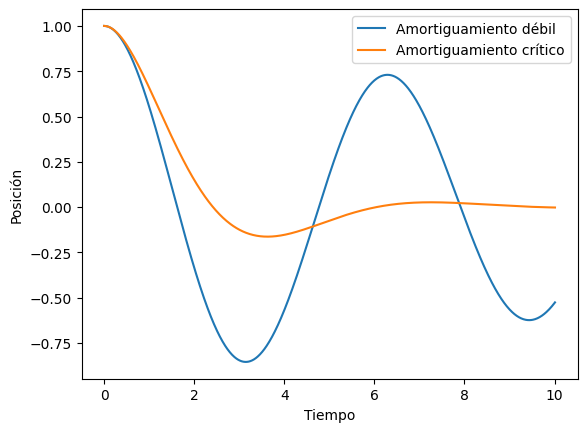

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def F(t, x, dx):
    return np.array([dx, -gamma*dx - omega_0**2*x])

def runge_kutta_4(F, t0, x0, dx0, tf, h):
    t = t0
    x = x0
    dx = dx0
    result = [(t, x)]
    while t < tf:
        k1 = h * F(t, x, dx)
        k2 = h * F(t + h/2, x + k1[0]/2, dx + k1[1]/2)
        k3 = h * F(t + h/2, x + k2[0]/2, dx + k2[1]/2)
        k4 = h * F(t + h, x + k3[0], dx + k3[1])
        x = x + (k1[0] + 2*k2[0] + 2*k3[0] + k4[0])/6
        dx = dx + (k1[1] + 2*k2[1] + 2*k3[1] + k4[1])/6
        t = t + h
        result.append((t, x))
    return result

# Parámetros del problema
gamma_weak = 0.1
gamma_critical = 1.0
omega_0 = 1.0
t0 = 0
x0 = 1
dx0 = 0
tf = 10
h = 0.01

# Resolver para amortiguamiento débil
gamma = gamma_weak
result_weak = runge_kutta_4(F, t0, x0, dx0, tf, h)

# Resolver para amortiguamiento crítico
gamma = gamma_critical
result_critical = runge_kutta_4(F, t0, x0, dx0, tf, h)

# Graficar los resultados
t_weak, x_weak = zip(*result_weak)
t_critical, x_critical = zip(*result_critical)
plt.figure()
plt.plot(t_weak, x_weak, label='Amortiguamiento débil')
plt.plot(t_critical, x_critical, label='Amortiguamiento crítico')
plt.xlabel('Tiempo')
plt.ylabel('Posición')
plt.legend()
plt.show()